<a href="https://colab.research.google.com/github/arssite/Datalysis/blob/main/Sentiment_Analysis_Youtube_comments_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:
You are tasked with developing a sentiment analysis and visualization tool for YouTube comments related to a specific video. The tool should take a YouTube video URL as input, retrieve the comments associated with that video using the YouTube Data API, analyze the sentiment of the comments, and generate visualizations in the form of a pie chart depicting the distribution of positive, negative, and neutral sentiments, as well as a word cloud representing the most frequently used words in the comments. The goal is to provide users with insights into the overall sentiment and prevalent topics discussed in the comments section of the video.

Enter YouTube video URL:  https://www.youtube.com/watch?v=shnCzHA0fEM


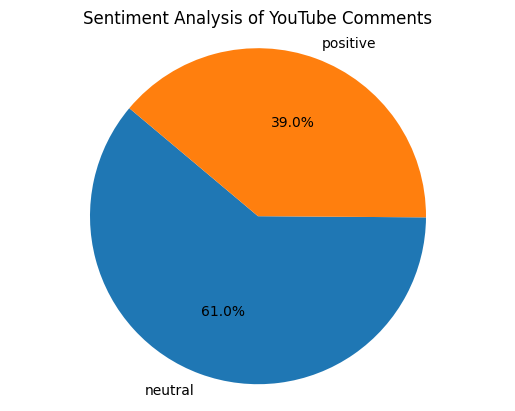

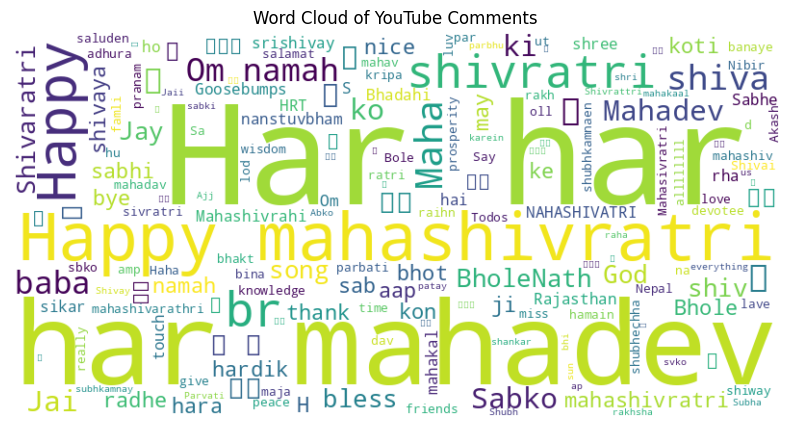

In [ ]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import requests
from collections import Counter
from googleapiclient.discovery import build

def fetch_comments(video_id):
    api_key = "Paste yours"
    youtube = build('youtube', 'v3', developerKey=api_key)
    response = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        maxResults=100
    ).execute()

    comments = []
    for item in response["items"]:
        comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
        comments.append(comment)
    return comments

def analyze_sentiment(comments):
    polarity_counter = Counter()
    for comment in comments:
        analysis = TextBlob(comment)
        polarity = analysis.sentiment.polarity
        if polarity > 0:
            polarity_counter['positive'] += 1
        elif polarity < 0:
            polarity_counter['negative'] += 1
        else:
            polarity_counter['neutral'] += 1
    return polarity_counter

def generate_pie_chart(sentiment_counts):
    labels = sentiment_counts.keys()
    sizes = sentiment_counts.values()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Sentiment Analysis of YouTube Comments')
    plt.show()

def generate_word_cloud(comments):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(comments))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of YouTube Comments')
    plt.show()

def main():
    video_url = input("Enter YouTube video URL: ")
    video_id = video_url.split("?v=")[1]
    comments = fetch_comments(video_id)
    sentiment_counts = analyze_sentiment(comments)
    generate_pie_chart(sentiment_counts)
    print('')
    generate_word_cloud(comments)

if __name__ == "__main__":
    main()
#: https://www.youtube.com/watch?v=shnCzHA0fEM